In [2]:
# Importing Libraries
from data_loader import load_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

df = load_data()
df_temp = df.copy()
df_temp['payment_method'].fillna('Unknown', inplace=True)

Successful connection to the database.
US data successfully loaded into a Pandas DataFrame.
Number of rows loaded: 1221
Database connection closed.


d:\DATA ANALITICS\Projects_Data_Analyst\PAYMENT_CARD_FRAUD_DETECTION_2025(SQL,PYTHON,POWER_BI)\notebooks\data_loader.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_usa = pd.read_sql_query(query, conn)
C:\Users\darie\AppData\Local\Temp\ipykernel_10348\2785862905.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_temp['payment_method'].fillna('Unknown', inplace=

C:\Users\darie\AppData\Local\Temp\ipykernel_10348\2377402449.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_fraud_by_age = df_age_analysis.groupby('age_group')['fraud_flag'].mean().reset_index()


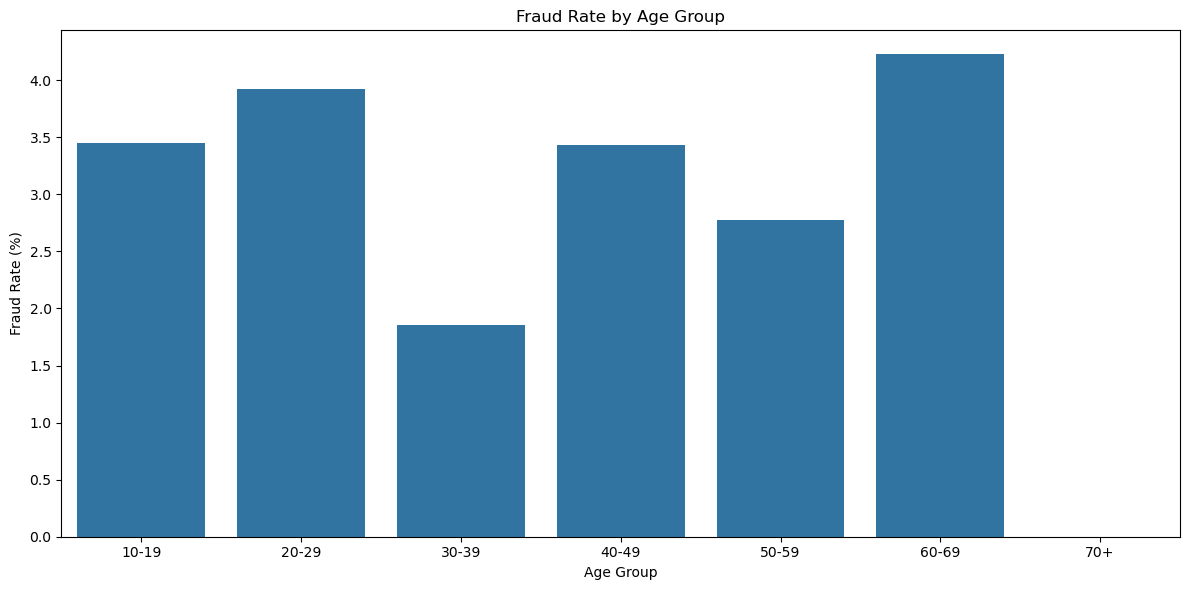

In [3]:
# --- Data Preparation ---
# Create age groups (bins) to analyze fraud risk by customer segment
bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
df_age_analysis = df_temp.copy()
df_age_analysis['age_group'] = pd.cut(df_age_analysis['customer_age'], bins=bins, labels=labels, right=False)

# Calculate the fraud rate per age group
# The fraud rate is the mean of 'fraud_flag', where True=1 and False=0
df_fraud_by_age = df_age_analysis.groupby('age_group')['fraud_flag'].mean().reset_index()
df_fraud_by_age['rate_fraud'] = df_fraud_by_age['fraud_flag'] * 100
df_fraud_by_age = df_fraud_by_age.drop(columns=['fraud_flag'])

# --- Data Visualization ---
# Plot the fraud rate by age group to identify high-risk segments
plt.figure(figsize=(12, 6))
sns.barplot(data=df_fraud_by_age, x='age_group', y='rate_fraud')

# Add descriptive titles and labels for the chart
plt.title('Fraud Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Fraud Rate (%)')

plt.tight_layout()
plt.show()